# Testing DEMV on Compas dataset

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from fairlearn.reductions import ExponentiatedGradient, BoundedGroupLoss, ZeroOneLoss, DemographicParity, GridSearch

from utils import *
from demv import DEMV

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('data2/compas.csv', index_col=0)

In [3]:
label = 'two_year_recid'
sensitive_vars = ['sex','race']
protected_group = {'sex':0, 'race': 0}

In [4]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear'))
])

## Biased Data

In [5]:
model, biasmetrics = cross_val(pipeline, data, label, protected_group, sensitive_vars, positive_label=0)

In [6]:
print_metrics(biasmetrics)

Statistical parity:  -0.265  +-  0.041
Disparate impact:  0.614  +-  0.055
Zero one loss:  0.136  +-  0.051
F1 score:  0.667  +-  0.018
Accuracy score:  0.667  +-  0.018


## DEMV Data

In [7]:
demv = DEMV(round_level=1)
demv_data = data.copy()

In [8]:
model, demv_metrics = cross_val(pipeline, demv_data, label, protected_group, sensitive_vars, debiaser=demv, positive_label=0)

In [9]:
print_metrics(demv_metrics)

Statistical parity:  -0.105  +-  0.045
Disparate impact:  0.824  +-  0.068
Zero one loss:  0.102  +-  0.043
F1 score:  0.664  +-  0.017
Accuracy score:  0.664  +-  0.017


## DEMV Evaluation

In [10]:
metrics = eval_demv(29, 116, data.copy(), pipeline, label, protected_group, sensitive_vars, positive_label=0)

In [11]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

##  Blackbox Postprocessing

##  Plot

In [13]:
df = prepareplots(metrics,'compas')

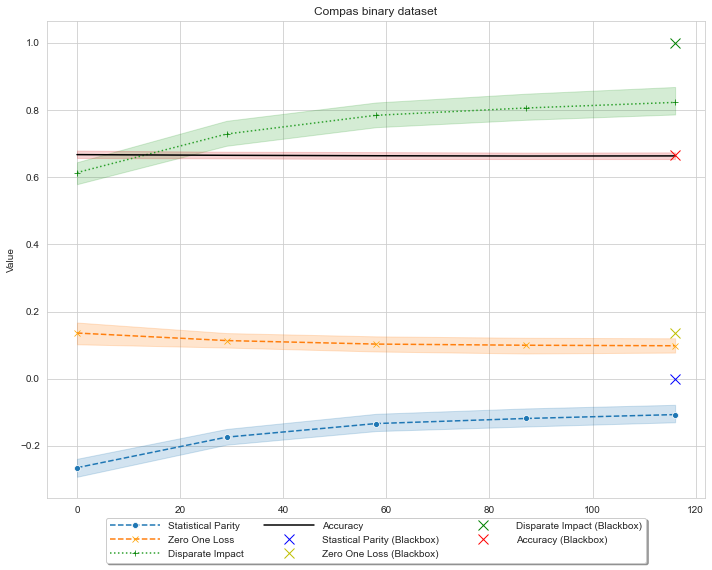

In [14]:
points = preparepoints(blackboxmetrics,demv.get_iters())
plot_metrics_curves(df, points, 'Compas binary dataset')

In [15]:
unprivpergentage(data,protected_group, demv.get_iters())

Dataset size: 6167
Unprivileged group size: 3374
Percentage of unprivileged group: 54.710556186152104
Number of iterations: 116


In [16]:
save_metrics('blackbox', 'compas', blackboxmetrics)